# 📝 What is a neural network

Neural network is a collection of neurons that are connected by layers. Each neuron is a small computing unit that performs simple calculations to collectively solve a problem. They are organized in layers. There are 3 types of layers: input layer, hidden layer and outter layer. Each layer contains a number of neurons, except for the input layer. Neural networks mimic the way a human brain processes information.

![](./assets/figures/images-2.png)

In [ ]:
%matplotlib inline

import os
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

## Components of a neural network

- **Activation function** determines whether a neuron should be activated or not. The computations that happen in a neural network include applying an activation function. If a neuron activates, then it means the input is important. The are different kinds of activation functions. The choice of which activation function to use depends on what you want the output to be. Another important role of an activation function is to add non-linearity to the model.
  - _Binary_ used to set an output node to 1 if function result is positive and 0 if the function result is negative. $f(x)= {\small \begin{cases} 0, & \text{if } x < 0\\ 1, & \text{if } x\geq 0\\ \end{cases}}$
  - _Sigmod_ is used to predict the probability of an output node being between 0 and 1. $f(x) = {\large \frac{1}{1+e^{-x}}} $
  - _Tanh_ is used to predict if an output node is between 1 and -1. Used in classification use cases. $f(x) = {\large \frac{e^{x} - e^{-x}}{e^{x} + e^{-x}}} $
  - _ReLU_ used to set the output node to 0 if fuction result is negative and keeps the result value if the result is a positive value. $f(x)= {\small \begin{cases} 0, & \text{if } x < 0\\ x, & \text{if } x\geq 0\\ \end{cases}}$


- **Weights** influence how well the output of our network will come close to the expected output value. As an input enters the neuron, it gets multiplied by a weight value and the resulting output is either observed or passed to the next layer in the neural network. Weights for all neurons in a layer are organized into one tensor


- **Bias** makes up the difference between the activation function's output and its intended output. A low bias suggests that the network is making more assumptions about the form of the output, whereas a high bias value makes less assumptions about the form of the output.


![](./assets/figures/what-is-a-neural-network.png)

We can say that an output $y$ of a neural network layer with weights $W$ and bias $b$ is computed as a summation of the inputs multiplied by the weights plus the bias 

$$x = \sum{(weights * inputs) + bias} $$

where $f(x)$ is the activation function.


## Build the Neural Network

Neural networks comprise of layers/modules that perform operations on data. The [torch.nn](https://pytorch.org/docs/stable/nn.html) namespace provides all the building blocks you need to build your own neural network. Every module in PyTorch subclasses the [nn.Module](https://pytorch.org/docs/stable/generated/torch.nn.Module.html). A neural network is a module itself that consists of other modules (layers). This nested structure allows for building and managing complex architectures easily.

For all that talk of classes, objects, and inheritance, this is where it all comes together in the wild. 

In the following sections, we'll build a neural network to classify images in the FashionMNIST dataset.


## Get Device for Training

We want to be able to train our model on a hardware accelerator like the GPU,
if it is available. Let's check to see if
[torch.cuda](https://pytorch.org/docs/stable/notes/cuda.html) is available, else we
continue to use the CPU.


In [2]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device} device")

Using cuda device


## Define the Class

1. We define our neural network by subclassing `nn.Module`
2. initialize the neural network layers in `__init__`.
3. Every `nn.Module` subclass implements the operations on input data in the `forward` method.


In [3]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28 * 28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10),
        )

    # this is a required @abstractmethod.
    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

We create an instance of `NeuralNetwork`, and move it to the `device`, and print
its structure.


In [4]:
model = NeuralNetwork().to(device)
print(model)

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


To use the model, we pass it the input data. This executes the model's `forward`,
along with some [background operations](https://github.com/pytorch/pytorch/blob/270111b7b611d174967ed204776985cefca9c144/torch/nn/modules/module.py#L866).
Do not call `model.forward()` directly!


Calling the model on the input returns a 2-dimensional tensor with dim=0 corresponding to each output of 10 raw predicted values for each class, and dim=1 corresponding to the individual values of each output. .
We get the prediction probabilities by passing it through an instance of the `nn.Softmax` module.


In [5]:
X = torch.rand(1, 28, 28, device=device)
logits = model(X)
pred_probab = nn.Softmax(dim=1)(logits)
y_pred = pred_probab.argmax(1)
print(f"Predicted class: {y_pred}")

Predicted class: tensor([0], device='cuda:0')


## Model Layers

Let's break down the layers in the FashionMNIST model. To illustrate it, we
will take a sample minibatch of 3 images of size 28x28 and see what happens to it as
we pass it through the network.


In [6]:
input_image = torch.rand(3, 28, 28)
print(input_image.size())

torch.Size([3, 28, 28])


### nn.Flatten

We initialize the [nn.Flatten](https://pytorch.org/docs/stable/generated/torch.nn.Flatten.html)
layer to convert each 2D 28x28 image into a contiguous array of 784 pixel values (
the minibatch dimension (at dim=0) is maintained).


In [7]:
flatten = nn.Flatten()
flat_image = flatten(input_image)
print(flat_image.size())

torch.Size([3, 784])


### nn.Linear

The [linear layer](https://pytorch.org/docs/stable/generated/torch.nn.Linear.html)
is a module that applies a linear transformation on the input using its stored weights and biases.


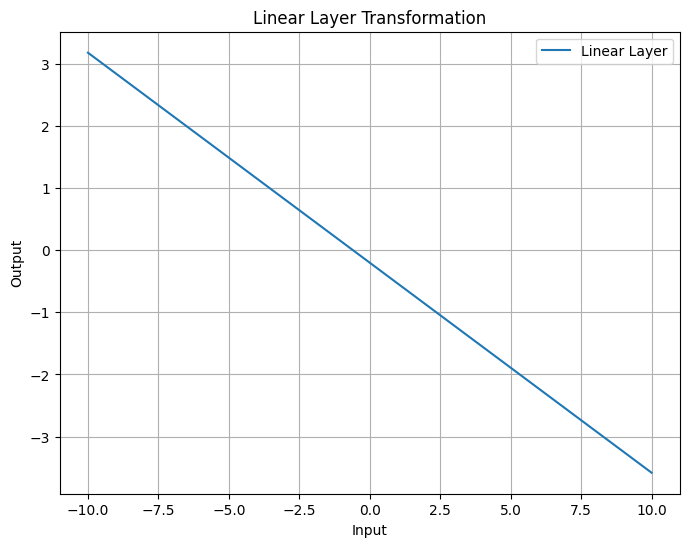

In [17]:
import matplotlib.pyplot as plt
import torch

# Generate data
x = torch.linspace(-10, 10, 100).view(-1, 1)
linear_layer = torch.nn.Linear(in_features=1, out_features=1)
y = linear_layer(x)

# Plot Linear layer transformation
plt.figure(figsize=(8, 6))
plt.plot(x.numpy(), y.detach().numpy(), label="Linear Layer")
plt.title("Linear Layer Transformation")
plt.xlabel("Input")
plt.ylabel("Output")
plt.legend()
plt.grid(True)
plt.show()

In [18]:
layer1 = nn.Linear(in_features=28 * 28, out_features=20)
hidden1 = layer1(flat_image)
print(hidden1.size())

torch.Size([3, 20])


### nn.ReLU

Non-linear activations are what create the complex mappings between the model's inputs and outputs.
They are applied after linear transformations to introduce _nonlinearity_, helping neural networks
learn a wide variety of phenomena.

In this model, we use [nn.ReLU](https://pytorch.org/docs/stable/generated/torch.nn.ReLU.html) between our
linear layers, but there's other activations to introduce non-linearity in your model.


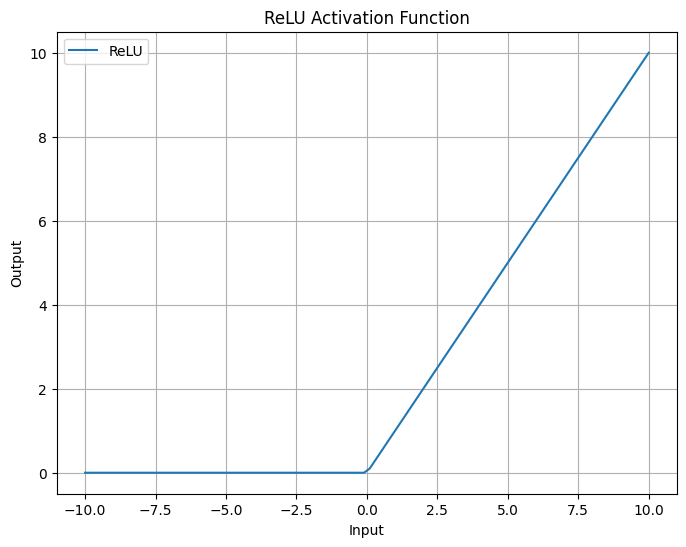

In [19]:
import matplotlib.pyplot as plt
import torch

# Generate data
x = torch.linspace(-10, 10, 100)
relu = torch.nn.ReLU()
y = relu(x)

# Plot ReLU function
plt.figure(figsize=(8, 6))
plt.plot(x.numpy(), y.numpy(), label="ReLU")
plt.title("ReLU Activation Function")
plt.xlabel("Input")
plt.ylabel("Output")
plt.legend()
plt.grid(True)
plt.show()

In [20]:
print(f"Before ReLU: {hidden1}\n\n")
hidden1 = nn.ReLU()(hidden1)
print(f"After ReLU: {hidden1}")

Before ReLU: tensor([[-0.1828,  0.0555,  0.3286,  0.5048, -0.1095,  0.0927,  0.3759,  0.2432,
          0.3825, -0.3855, -0.2927,  0.1272, -0.7656,  0.3418, -0.1565,  0.9989,
         -0.6925,  0.5586,  0.4299, -0.0019],
        [-0.3234,  0.2866,  0.4014,  0.0341, -0.3601,  0.2765,  0.1055,  0.1957,
          0.2241, -0.2681, -0.0235, -0.0148, -0.4835,  0.5561,  0.0829,  1.4046,
         -0.3486,  0.3678,  0.4086, -0.1204],
        [-0.2377,  0.1804,  0.3404,  0.1065, -0.0495,  0.1418,  0.2809,  0.2951,
          0.4793, -0.4580,  0.0694,  0.1856, -0.2872,  0.6054, -0.0079,  1.0229,
         -0.9809,  0.4161,  0.4094,  0.3985]], grad_fn=<AddmmBackward0>)


After ReLU: tensor([[0.0000, 0.0555, 0.3286, 0.5048, 0.0000, 0.0927, 0.3759, 0.2432, 0.3825,
         0.0000, 0.0000, 0.1272, 0.0000, 0.3418, 0.0000, 0.9989, 0.0000, 0.5586,
         0.4299, 0.0000],
        [0.0000, 0.2866, 0.4014, 0.0341, 0.0000, 0.2765, 0.1055, 0.1957, 0.2241,
         0.0000, 0.0000, 0.0000, 0.0000, 0.5561, 0.08

### nn.Sequential

[nn.Sequential](https://pytorch.org/docs/stable/generated/torch.nn.Sequential.html) is an ordered
container of modules. The data is passed through all the modules in the same order as defined. You can use
sequential containers to put together a quick network like `seq_modules`.


In [28]:
seq_modules = nn.Sequential(flatten, layer1, nn.ReLU(), nn.Linear(20, 10))
input_image = torch.rand(3, 28, 28)
logits = seq_modules(input_image)

### nn.Softmax

The last linear layer of the neural network returns `logits` - raw values in [-\infty, \infty] - which are passed to the
[nn.Softmax](https://pytorch.org/docs/stable/generated/torch.nn.Softmax.html) module. The logits are scaled to values
[0, 1] representing the model's predicted probabilities for each class. `dim` parameter indicates the dimension along
which the values must sum to 1.


$$
\text{softmax}(z_i) = \frac{e^{z_i}}{\sum_{j=1}^n e^{z_j}}
$$



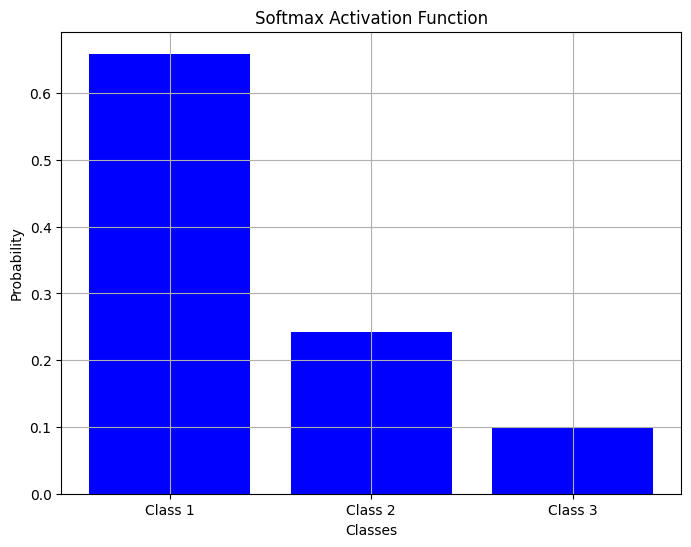

In [29]:
import torch
import matplotlib.pyplot as plt

# Generate some logits
logits_ = torch.tensor([2.0, 1.0, 0.1])

# Apply softmax
softmax_layer = torch.nn.Softmax(dim=0)
softmax_values = softmax_layer(logits_)

# Plot the softmax values
plt.figure(figsize=(8, 6))
plt.bar(["Class 1", "Class 2", "Class 3"], softmax_values.numpy(), color="blue")
plt.title("Softmax Activation Function")
plt.xlabel("Classes")
plt.ylabel("Probability")
plt.grid(True)
plt.show()

In [30]:
softmax = nn.Softmax(dim=1)
pred_probab = softmax(logits)

## Model Parameters

Many layers inside a neural network are _parameterized_, i.e. have associated weights
and biases that are optimized during training. Subclassing `nn.Module` automatically
tracks all fields defined inside your model object, and makes all parameters
accessible using your model's `parameters()` or `named_parameters()` methods.

In this example, we iterate over each parameter, and print its size and a preview of its values.


In [31]:
print(f"Model structure: {model}\n\n")

for name, param in model.named_parameters():
    print(f"Layer: {name} | Size: {param.size()} | Values : {param[:2]} \n")

Model structure: NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


Layer: linear_relu_stack.0.weight | Size: torch.Size([512, 784]) | Values : tensor([[-0.0199, -0.0185, -0.0299,  ...,  0.0353, -0.0257, -0.0147],
        [-0.0136, -0.0256,  0.0111,  ...,  0.0284,  0.0335, -0.0325]],
       device='cuda:0', grad_fn=<SliceBackward0>) 

Layer: linear_relu_stack.0.bias | Size: torch.Size([512]) | Values : tensor([-0.0222, -0.0310], device='cuda:0', grad_fn=<SliceBackward0>) 

Layer: linear_relu_stack.2.weight | Size: torch.Size([512, 512]) | Values : tensor([[-0.0028, -0.0304, -0.0282,  ..., -0.0101, -0.0144,  0.0410],
        [-0.0334, -0.0164,  0.0209,  ...,  0.0267, -0.0224, -0.0181]],
       device='cuda:0', grad_fn=<Sl

## Further Reading

- [torch.nn API](https://pytorch.org/docs/stable/nn.html)
